In [1]:
import nidaqmx
import numpy as np
import matplotlib.pyplot as plt
import visa
import time
from lantz import MessageBasedDriver, Q_
from lantz.core import Feat
from lantz.core import mfeats
    

def adquisicion(task,time,freq):
    dt = np.divide(1,freq)
    print(dt)
    time_vector = np.arange(0,time,dt)
    print(len(time_vector))
    num_of_points = len(time_vector)  
    data = task.read(number_of_samples_per_channel=num_of_points)
    print(len(data))
    return (time_vector,np.asarray(data))

0.0002
500
500
5000.0


(0, 0.1)

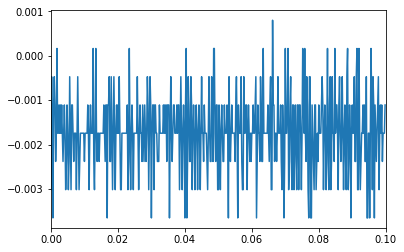

In [3]:
time = 0.1
freq = 5000
nsamples = 2000

with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan('Dev1/ai0',
                                         terminal_config=nidaqmx.constants.TerminalConfiguration.DIFFERENTIAL)
    task.timing.cfg_samp_clk_timing(freq,samps_per_chan=nsamples)
    (tiempos,data) = adquisicion(task,time,freq)
#    task.write([1.1, 2.2, 3.3, 4.4, 5.5], auto_start=True)
    print(task.timing.samp_clk_rate)

plt.plot(tiempos,data)  
plt.xlim(0,0.1)    

In [ ]:
class adquisicion_DAQ(nidaqmx.Task,tipo='Analog'):
    def __init__(self,):
        if tipo == 'Analog':
            # Por default se abre un canal en configuracion Differential
            self.ai_channels.add_ai_voltage_chan('Dev1/ai0',
                                             terminal_config=nidaqmx.constants.TerminalConfiguration.DIFFERENTIAL)        
    @Feat
    def freq(self):
        return task.timing.samp_clk_rate
    @freq.setter
    def timebase(self,freq):
        # Se define una cantidad de samples de manera de poder medir 2 segundos en la frequencia definida
        task.timing.cfg_samp_clk_timing(freq,samp_per_chan=np.floor(2*freq))

    def adquisicion(self,time):
        dt = np.divide(1,self.freq)
        time_vector = np.arange(0,time,dt)
        num_of_points = len(time_vector)  
        data = self.read(number_of_samples_per_channel=num_of_points)
        return (time_vector,np.asarray(data))

        
class Generador(MessageBasedDriver):
    # Feats punciona como un property, pero ademas acepta otras opciones
    @Feat()
    def idn(self):
        return self.query('*IDN?')

    # La idea es no usar sets and gets como metodos, sino definir propiedades
    def setFrequency(self,freq):
        self.write("SOURce1:FREQuency:FIXed "+str(freq))
        
    # Una manera comoda de unas Feats es con mfeats, donde directametne pasas el getter, el setter, las unidades y un limite para los valroes
    amplitude = mfeats.QuantityFeat('SOURce1:VOLT:LEV:IMM:AMPL?','SOURce1:VOLT:LEV:IMM:AMPL {}',units='V',limits=(0.2,5))
        
    def setWaveform(self,waveform ='Senoidal'):
        switcher = {'Senoidal':"SIN",'Cuadrada':"SQU",'Pulso':"PULS"}
        self.write("SOURce1:FUNCtion "+switcher.get(waveform,'Senoidal'))  